In [1]:
import numpy as np
import healpy as hp
import lsst.sims.skybrightness_pre as sb
%matplotlib inline

In [2]:
sky_model = sb.SkyModelPre(speedLoad=False)

In [3]:
mjd = 59853.9860577671
sky = sky_model.returnMags(mjd, airmass_mask=False,planet_mask=False,moon_mask=False, zenith_mask=False)


/Users/yoachim/git_repos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:373: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


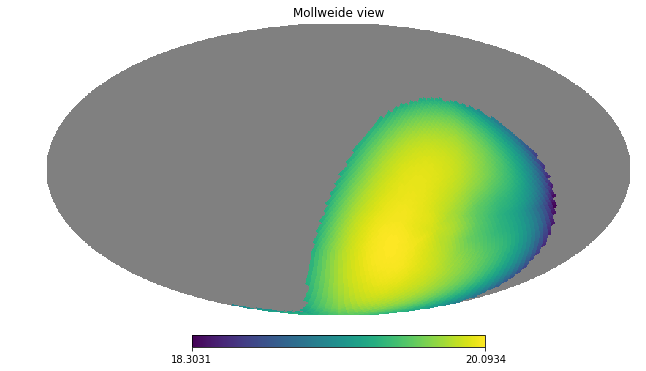

In [4]:
hp.mollview(sky['r'])

In [5]:
hp.npix2nside(sky['r'].size), np.sum(np.isfinite(sky['r'])), sky['r'].size

(32, 3689, 12288)

In [6]:
%timeit sky_model.returnMags(mjd, airmass_mask=False,planet_mask=False,moon_mask=False, zenith_mask=False)

294 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%timeit sky_model.returnMags(mjd+20, airmass_mask=False,planet_mask=False,moon_mask=False, zenith_mask=False)

272 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit sky_model.returnMags(mjd+60, airmass_mask=False,planet_mask=False,moon_mask=False, zenith_mask=False)

507 µs ± 95.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit sky_model.returnMags(mjd+55, airmass_mask=False,planet_mask=False,moon_mask=False, zenith_mask=False)

272 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


So, generating full sky sky brightness maps (nside=32, 12,288 healpixels, with 3689 above airmass limit) in all 6 filters takes about 300 ms

In [10]:
# How many times are we calling this thing anyway?  300,000 times for greedy. 1.8 million greedy, so maybe 25,000 times?
print(330000*300e-6/60, 'minutes')

1.6499999999999997 minutes
